<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/NN-Time-series/blob/main/Time_Series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f02a4aa8-c6ec-6581-efff-9ae189c89fc2)


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

The dataset and code used in this notebook is taken from Keras for learning purpose. The dataset used here is called FordA, which comes from UCR archive.
Each timeseries corresponds to a measurement of engine noise by a motor sensor.we are going to classify the signal in this notebook. The timeseries data used here is the univariate. Let's explore load and explore the dataset.

In [4]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    print("data",data)
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

data [[-1.         -0.79717168 -0.66439208 ... -0.66439208 -1.0737958
  -1.5643427 ]
 [ 1.          0.80485472  0.63462859 ... -0.71488505 -0.56044294
  -0.31908642]
 [-1.          0.7279851   0.11128392 ...  0.39446303  0.33940042
   0.25539062]
 ...
 [-1.         -0.57005428 -0.33316523 ... -1.3937145  -0.94273327
  -0.27072168]
 [ 1.          2.0067321   2.0791499  ... -0.43214504 -0.44123126
  -0.28070891]
 [-1.         -0.12524091 -0.32536268 ...  0.55576053  0.57445102
   0.57311598]]
data [[-1.         -0.14040239  0.17164128 ... -0.69040244 -0.97659635
  -0.79426313]
 [-1.          0.33403756  0.32225332 ... -1.0417721  -1.1596145
  -1.3756589 ]
 [-1.          0.71668608  0.74436655 ... -3.6752806  -4.1366217
  -4.3396117 ]
 ...
 [ 1.          0.71008362  0.59397882 ... -0.12655282 -0.11782239
  -0.18909413]
 [ 1.          0.00684706 -0.14062427 ... -1.0007084  -1.0841075
  -1.109963  ]
 [ 1.         -0.54135529 -0.24172258 ... -0.09362504 -0.90080431
  -1.778341  ]]


The data is 2D array. the first column of each row is the target class.

slicing as data[:,0] means for all rows, take first column. which gives only the labels. and data[:,1:] means for all rows, take all the columns from 1. this gives all the features.

Example:

1    0.2    0.3    0.5

2    0.1    0.4    0.6

1    0.3    0.2    0.9

Then:

y = data[:, 0] → [1, 2, 1]

x = data[:, 1:] → [[0.2, 0.3, 0.5], [0.1, 0.4, 0.6], [0.3, 0.2, 0.9]]




# visualize the data

In [7]:
x_train,y_train

(array([[-0.79717168, -0.66439208, -0.37301463, ..., -0.66439208,
         -1.0737958 , -1.5643427 ],
        [ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
         -0.56044294, -0.31908642],
        [ 0.7279851 ,  0.11128392, -0.49912439, ...,  0.39446303,
          0.33940042,  0.25539062],
        ...,
        [-0.57005428, -0.33316523, -0.29351853, ..., -1.3937145 ,
         -0.94273327, -0.27072168],
        [ 2.0067321 ,  2.0791499 ,  2.0220362 , ..., -0.43214504,
         -0.44123126, -0.28070891],
        [-0.12524091, -0.32536268, -0.48823697, ...,  0.55576053,
          0.57445102,  0.57311598]]),
 array([-1,  1, -1, ..., -1,  1, -1]))

In [10]:
print(y_train==1)

[False  True False ... False  True False]


In [9]:
x_train[y_train == 1]

array([[ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
        -0.56044294, -0.31908642],
       [-0.54089708, -1.0140195 , -1.2982259 , ...,  1.5424093 ,
         0.90918743,  0.20600638],
       [-0.33405956, -1.0080137 , -1.5543535 , ...,  1.2111725 ,
         0.86081039,  0.35938834],
       ...,
       [-0.98484089, -1.116878  , -1.1721631 , ...,  2.6847356 ,
         2.5264775 ,  2.1901609 ],
       [ 0.0419937 ,  0.42225501,  0.74052866, ..., -0.48260868,
        -0.46776853, -0.39375517],
       [ 2.0067321 ,  2.0791499 ,  2.0220362 , ..., -0.43214504,
        -0.44123126, -0.28070891]])

label: -1
label: 1


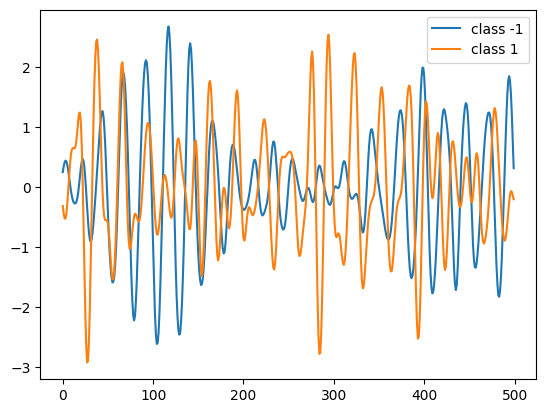

In [27]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0)) # check total class in the dataset

plt.figure()
for c in classes:
    print("label:",c)
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

Observation: The time series is of length 500. The values are in various range and not normalized. we should normalized this for the neural network.  For this specific dataset, the data is already z-normalized, means each timeseries sample has a mean equal to zero and the standard deviation equal to 1.

**Note:** This type of normalization is commono in timeseries classification

In [21]:
x_train.shape[0],y_train.shape[0]

(3601, 3601)

In [19]:
x_train.shape

(3601, 500, 1)

In [16]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))

Before reshape:
* `x_train.shape = (3600, 500)`
  → 3600 samples, each with 500 features (1D time series)

After reshape:

* `x_train.shape = (3600, 500, 1)`

You're likely using models like **1D Convolutional Neural Networks (CNNs)** or **RNNs (like LSTM)**, which expect input in the shape of:

```
(samples, timesteps, features)
```

* `samples` = number of training examples
* `timesteps` = number of time points in each example (e.g., 500)
* `features` = 1 (each timestep has one value — it's a univariate time series)

| Before reshape          | After reshape                   |
| ----------------------- | ------------------------------- |
| `(3600, 500)`           | `(3600, 500, 1)`                |
| 2D (samples × features) | 3D (samples × time × 1 feature) |

This reshape makes the data compatible with layers like:

```python
Conv1D, LSTM, GRU, Bidirectional(LSTM), etc.
```

In [24]:
num_classes=len(np.unique(y_train))
num_classes

2

In [25]:
# shuffle the train set
i=np.random.permutation(len(x_train))
x_train=x_train[i]
y_train=y_train[i]

The permutation shuffle the the array. for example:

np.random.permutation([1, 4, 9, 12, 15])

array([15,  1,  9,  4, 12]) # random

In [28]:
# Right now the labels are -1 and 1. lets standardize as 0 and 1
y_train[y_train==-1]=0
y_test[y_test==1]=0

# Build a model